In [1]:
import os
from os.path import isfile, join

In [6]:
def list_files(path):
    return [file for file in os.listdir(path) if isfile(join(path, file))]

In [9]:
import gzip
import numpy as np

In [12]:
def get_images(path):
    for file in list_files(path):
        with gzip.open(join(path, file), "rb") as f:
            if "train-images" in file:
                _ = int.from_bytes(f.read(4), "big")
                number_of_items = int.from_bytes(f.read(4), "big")
                rows = int.from_bytes(f.read(4), "big")
                columns = int.from_bytes(f.read(4), "big")
                pixels = f.read()
                x_train = np.frombuffer(pixels, dtype=np.uint8)
                x_train = x_train.reshape((number_of_items, rows, columns))
            elif "train-labels" in file:
                labels = f.read()[8:]
                y_train = np.frombuffer(labels, dtype=np.uint8)
            elif "t10k-images" in file:
                _ = int.from_bytes(f.read(4), "big")
                number_of_items = int.from_bytes(f.read(4), "big")
                rows = int.from_bytes(f.read(4), "big")
                columns = int.from_bytes(f.read(4), "big")
                pixels = f.read()
                x_test = np.frombuffer(pixels, dtype=np.uint8)
                x_test = x_test.reshape((number_of_items, rows, columns))
            elif "t10k-labels" in file:
                labels = f.read()[8:]
                y_test = np.frombuffer(labels, dtype=np.uint8)
    return x_train, y_train, x_test, y_test

In [13]:
dataset_path = "./dataset/"
x_train, y_train, x_test, y_test = get_images(dataset_path)

The number is: 1


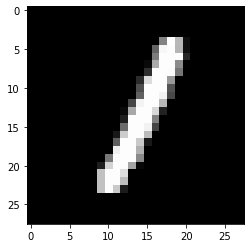

In [21]:
# Testing is data is correct
import matplotlib.pyplot as plt
from random import randint

i = randint(0, 1000)
plt.imshow(x_train[i], cmap=plt.get_cmap("gray"))
print("The number is: " + str(y_train[i]))